# Notebook for exploring the Mississippi River tank data [Time Series]

## Getting setup

Python and NTU conversion equation loads

In [1]:
from math import nan
import numpy as np
import os as os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib widget
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display
import datetime

# NTU to SSC calibration equations for the OBS

def NTU_C1(NTU):
    return 2.6836*NTU - 33.943

def NTU_C2(NTU):
    return 2.121*NTU

Get the working directory and a list of folders that contain data by experiment

In [2]:
working = os.getcwd()
datadir = sorted(glob(working+"/Time_Series/*/"))
for i in range(0,len(datadir)):
    print('Data directory:',datadir[i],'(index:',i,')')

Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Time_Series/Exp01_2020-06-26_Tank1/ (index: 0 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Time_Series/Exp02_2020-06-27_Tank1/ (index: 1 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Time_Series/Exp03_2020-06-28_Tank1/ (index: 2 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Time_Series/Exp04_2020-06-29_Tank1/ (index: 3 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Time_Series/Exp05_2020-06-30_Tank1/ (index: 4 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Time_Series/Exp06_2020-07-02_Tank1/ (index: 5 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Time_Series/Exp07_2020-06-25_Tank2/ (index: 6 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Time_Series/Exp08_2020-06-26_Tank2/ (index: 7 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Time_Series/Exp09_2020-06-27_Tank2/ (index: 8 )
Data directory: /Users/strom-adm/My Drive/Fron

## User input

Choose the experiment you want to look at by selecting the appropriate index value ```(j=X)```

In [3]:
j = 1

## Data

Loads the data contained in the selected directory and displays it in tabular form. The following files need to exist in the chosen directory:

- ```size_aligned.csv``` - contains the measured size statistics at specified times
- ```G_S_data.csv``` - Turbulent shear rate and salinity time series data
- ```obs_aligned.csv``` - OBS time series in NTU

In [4]:
# grab the folder name

expname = os.path.basename(os.path.dirname(datadir[j]))
expinfo = expname.split('_') # break the folder down to get the exp num (i=0), date (i=1), and tank info (i=2)

# set the path to the .csv files

sizedata = datadir[j] + '/size_aligned.csv'
GSdata = datadir[j] + '/G_S_data.csv'
OBSdata = datadir[j] + '/obs_aligned.csv'

# read in the data

size = pd.read_csv(sizedata)
GS = pd.read_csv(GSdata)
obs = pd.read_csv(OBSdata)

obs['mgL'] = NTU_C1(obs['NTU']) # add in a SSC column using the OBS calibration

# build the labels table for placing "break" marks and labels on figures

labels = GS[0:-1:2].copy()
labels.reset_index(inplace = True,drop = True)

## Plot the data

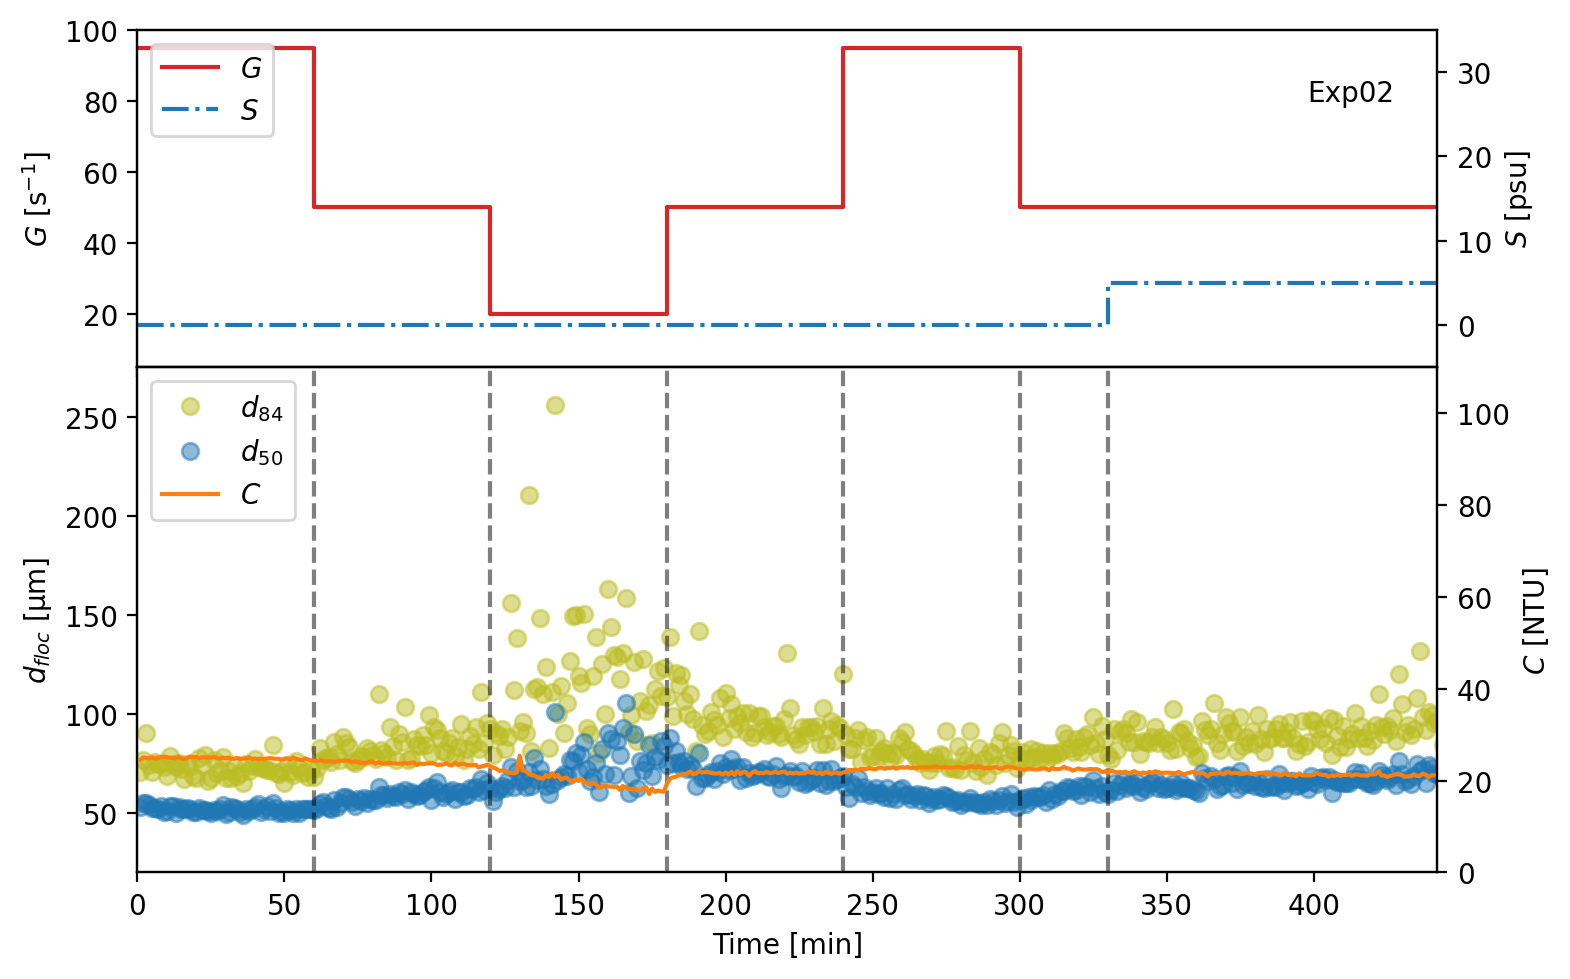

In [5]:
# set the plot parameter ranges and colors

Gmin = 5
Gmax = 100
    
Smin = -5
Smax = 35

dmin = 20
dmax = 275

cminMGL = min(obs['mgL'])-5
cmaxMGL = 120

cminNTU = 0
cmaxNTU = 110

xmin = 0
xmax = GS['min'].iloc[-1]
# xmax = 375

# gcolor = 'C3'
# scolor = 'C2'
# d50color = 'C0'
# d84color = 'C3'
# ccolor = 'k'

gcolor = 'C3'
scolor = 'C0'
d50color = 'C0'
d84color = 'C8'
ccolor = 'C1'

# make the figure

fig = plt.figure(figsize=(8,5))

gs = fig.add_gridspec(2,hspace=0, height_ratios=[2,3])
axs = gs.subplots(sharex=True, sharey=False)

axs[0].plot(GS['min'], GS['G_Hz'], color=gcolor, alpha=1, label='$G$')
axs[0].set_ylabel('$G$ [$\mathrm{s^{-1}}$]')

axs_twin1 = axs[0].twinx()
axs_twin1.plot(GS['min'], GS['S_ppt'], linestyle = '-.',color=scolor, alpha=1, label='$S$')
axs_twin1.set_ylabel('$S$ [psu]')
axs_twin1.set_ylim(Smin,Smax)

# axs[0].set_xlim(xmin,xmax)
axs[0].set_ylim(Gmin,Gmax)
axs[0].text(xmax-0.1*xmax,80, expinfo[0], # backgroundcolor='white', 
        clip_on='True', multialignment='left', alpha=1) #weight = 'bold'

li1,la1 = axs[0].get_legend_handles_labels()
li2,la2 = axs_twin1.get_legend_handles_labels()

axs[0].legend(li1+li2,la1+la2,loc=2)

if 'd84_mu' in size.columns:
    axs[1].plot(size['min_from_start'], size['d84_mu'],'o', color=d84color, alpha=0.5,label='$d_{84}$')
axs[1].plot(size['min_from_start'], size['d50_mu'],'o', color=d50color, alpha=0.5,label='$d_{50}$')
axs[1].set_ylabel('$d_{\mathit{floc}}$ [µm]')
axs[1].set_xlabel('Time [min]')
axs[1].set_ylim(dmin,dmax)
axs[1].set_xlim(xmin,xmax)
for i in range(1,len(labels)):
    axs[1].axvline(x=labels['min'][i],color='k', linestyle='--', alpha=0.5)

axs_twin2 = axs[1].twinx()
# axs_twin2.plot(obs['min_from_start'], obs['mgL'], color=ccolor, alpha = 1,label='$C$')
# axs_twin2.set_ylabel('$C$ [mg/L]')
# axs_twin2.set_ylim(cminMGL,cmaxMGL)
axs_twin2.plot(obs['min_from_start'], obs['NTU'], color=ccolor, alpha = 1,label='$C$')
axs_twin2.set_ylabel('$C$ [NTU]')
axs_twin2.set_ylim(cminNTU,cmaxNTU)

li3,la3 = axs[1].get_legend_handles_labels()
li4,la4 = axs_twin2.get_legend_handles_labels()

axs[1].legend(li3+li4,la3+la4,loc=2)

fig.tight_layout();